#  INTRODUCTION

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

# Loading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Music_Genre

/content/drive/MyDrive/Music_Genre


In [5]:
df = pd.read_csv("user - preference.csv")
df.head()

,Age,Gender,Preference
0,20.0,female,Rock
1,19.0,female,Rock
2,20.0,female,Latino
3,22.0,female,Alternative
4,20.0,female,"Hiphop, Rap"


In [6]:
df.shape

(1010, 3)

# Cleaning the Data

Look into the data to find missing values

In [7]:
df.isnull().sum()

Age            7
Gender         6
Preference    74
dtype: int64

Firstly, we drop the missing data from dataframe and reset our index

In [8]:
df.dropna(inplace = True)
df.reset_index(drop=True,inplace=True)
row = len(df.index)

In [9]:
df.shape

(925, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         925 non-null    float64
 1   Gender      925 non-null    object 
 2   Preference  925 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.8+ KB


All of numerical data has entered as float64 format and none of them has decimal part, thus we convert these data from float to integer format.

In [11]:
for each in range(0,2) :
    if type(df.iloc[1,each]) == np.float64 :
        df[df.columns[each]] = df[df.columns[each]].astype(int)
    else :
        df[df.columns[each]] = df[df.columns[each]]

Sorting categorical values :
Gender
Alcohol
Education

In [12]:
df.Gender.unique()

array(['female', 'male'], dtype=object)

In "Gender" column, there are "female" and "male" values, they convert as "female"= 0 , "male = 1"

In [13]:
for sex in range(0,row) :
    if df.loc[sex,'Gender'] == 'female' :
        df.loc[sex,'Gender'] = 0
    else :
        df.loc[sex,'Gender'] = 1

In [14]:
df['Gender'].tail()

920    0
921    1
922    0
923    0
924    0
Name: Gender, dtype: object

In [15]:
df['Gender'] = df['Gender'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         925 non-null    int64 
 1   Gender      925 non-null    int64 
 2   Preference  925 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.8+ KB


# Exploring Data

In [17]:
df.corr()

,Age,Gender
Age,1.000000,0.126457
Gender,0.126457,1.000000


Age and gender have a small positive correlation

    Coefficient,

---


    Strength of Association         Positive	       Negative
    Small	                       .1 to .3	      -0.1 to -0.3
    Medium	                      .3 to .5	      -0.3 to -0.5
    Large                           .5 to 1.0	     -0.5 to -1.0

In [18]:
df.describe()

,Age,Gender
count,925.000000,925.000000
mean,20.419459,0.407568
std,2.800211,0.491648
min,15.000000,0.000000
25%,19.000000,0.000000
50%,20.000000,0.000000
75%,22.000000,1.000000
max,30.000000,1.000000


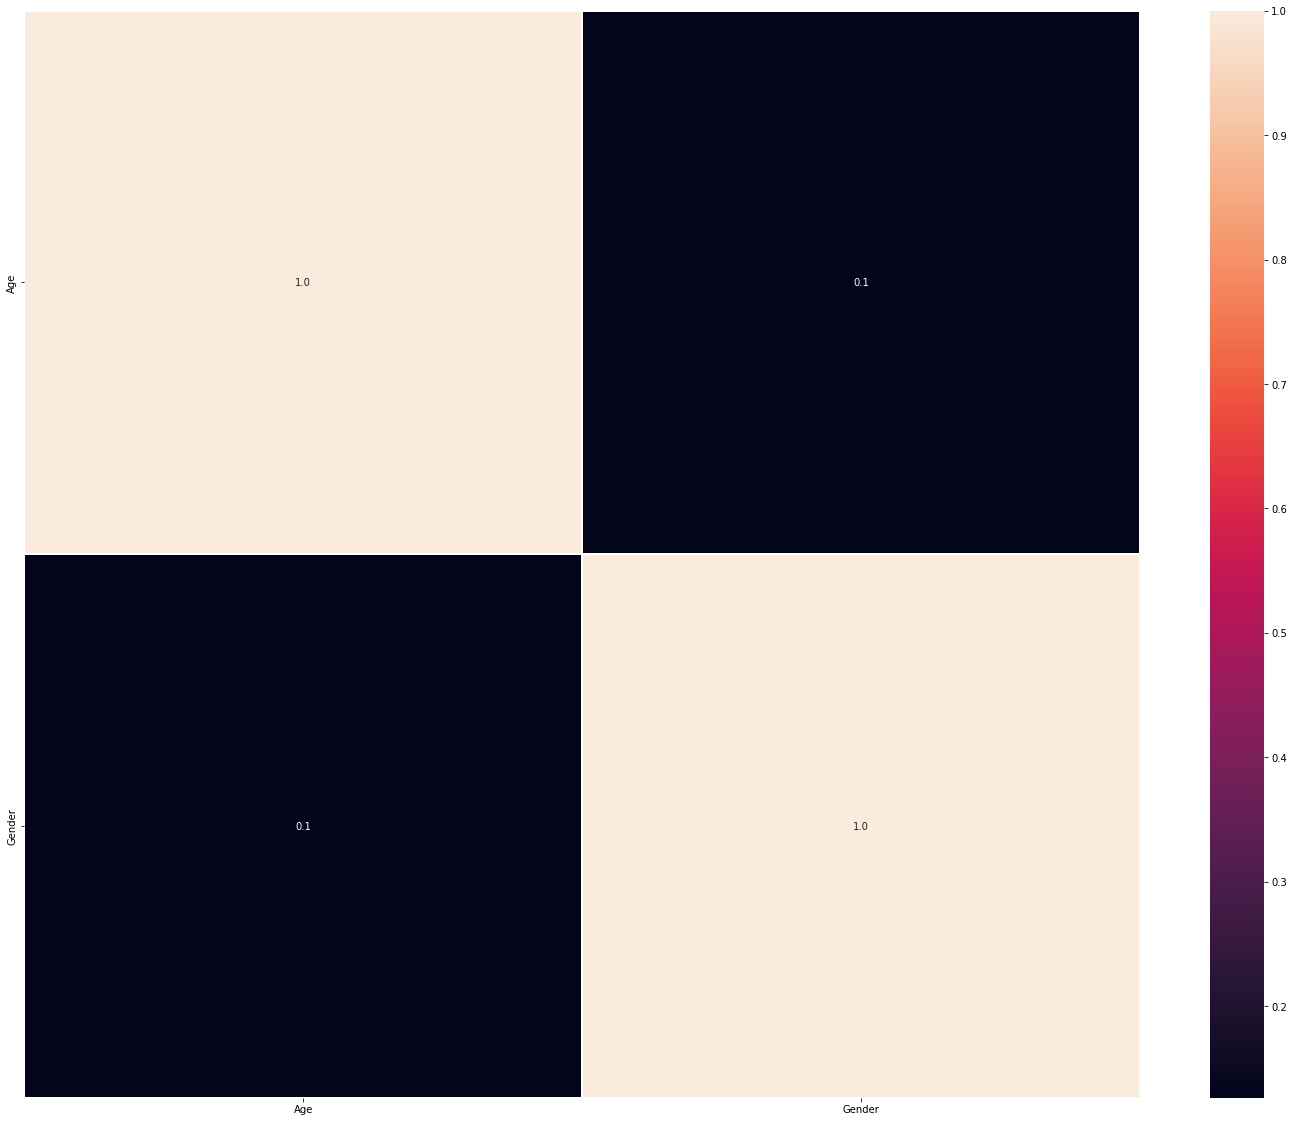

In [19]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

# Processing the Data
We need to divide the data into input data and output data.

Input : age, gender

Output : music preferrence

In [65]:
X= df.drop(columns=['Preference'])
y= df['Preference']

Splitting data into training set and test set

In [66]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2)

Feature Scaling

In [67]:
cols = X_train.columns 
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [68]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [69]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [70]:
X_train.describe()

,Age,Gender
count,7.400000e+02,7.400000e+02
mean,-4.800964e-16,5.521109e-17
std,1.000676e+00,1.000676e+00
min,-1.941780e+00,-8.373467e-01
25%,-5.208482e-01,-8.373467e-01
50%,-1.656153e-01,-8.373467e-01
75%,5.448504e-01,1.194249e+00
max,3.386713e+00,1.194249e+00


# Creating and Training the model

In [81]:
svc=SVC()

In [82]:
svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC()

In [83]:
y_prediction = svc.predict([[22,0]])
y_prediction

array(['Rock'], dtype=object)

The model was asked to predict the music preferrence of a 22-year-old female and the prediction was Rock.

In [84]:
y_prediction = svc.predict([[30,0]])
y_prediction

array(['Rock'], dtype=object)

The model was asked to predict the music preferrence of a 30-year-old female and the prediction was Rock.

# Evaluation

We want to evaluate the model on its predictions.

In [85]:
predictions= svc.predict(X_test)
predictions

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Classical music',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop',
       'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop',
       'Rock', 'Pop', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock',
       'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop',
       'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Classical music', 'Rock',
       'Classical music

In [86]:
accuracy = accuracy_score(y_test, predictions)
print('Model accuracy score with default hyperparameters: ')
accuracy

Model accuracy score with default hyperparameters: 


0.11351351351351352

Outliers in the dataset, so increase the C value. C=100

In [88]:
svc=SVC(C=100.0)

In [89]:
svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC(C=100.0)

In [90]:
y_prediction = svc.predict([[22,0]])
y_prediction

array(['Dance'], dtype=object)

The model was asked to predict the music preferrence of a 22-year-old female and the prediction was Dance.

In [91]:
y_prediction = svc.predict([[30,0]])
y_prediction

array(['Dance'], dtype=object)

The model was asked to predict the music preferrence of a 30-year-old female and the prediction was Dance.

# Evaluation

We want to evaluate the model on its predictions.

In [92]:
predictions= svc.predict(X_test)
predictions

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Hiphop, Rap',
       'Hiphop, Rap', 'Pop', 'Rock', 'Hiphop, Rap', 'Rock', 'Rock', 'Pop',
       'Pop', 'Rock', 'Hiphop, Rap', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Classical music', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop',
       'Rock', 'Pop', 'Swing, Jazz', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock',
       'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock',
       'Swing, Jazz', 'Rock', 'Pop', 'Hiphop, Rap', 'Pop', 'Hiphop, Rap',
       'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock',
       'Hiphop, Rap', 'Rock', 'Rock', 'Pop', 'Pop', 'Pop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hiphop, Rap', 'Rock', 'Rock', 'Rock', 'Rock',
       'Pop', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop',
       'Rock', 'Rock', 'Pop', 'Rock', 'Hiphop, Rap', 'Rock', 'Rock',
       'Rock', '

In [97]:
accuracy = accuracy_score(y_test, predictions)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with rbf kernel and C=100.0 : 0.0973


The model has a very low accuracy. Consider adding more features